In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import statsmodels as sm
from pylab import rcParams
from numpy import median
import matplotlib.dates as mdates
np.random.seed(123)
%matplotlib inline
sns.set(font_scale=1.5)
rcParams['figure.figsize'] = 12, 8
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('muted'))
from datetime import datetime
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [2]:
def f(x):
    return math.sin(x)
print f(math.pi / 2)

1.0


In [3]:
f_points = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
f_points['y'] = f_points.x.apply(f)

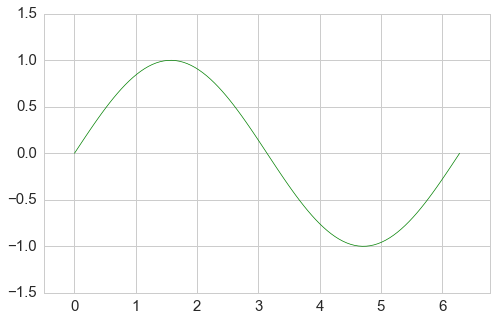

In [4]:
plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))

In [5]:
num_points = 10

In [6]:
train = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
train['y'] = train.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

In [7]:
test = pd.DataFrame({'x': np.linspace(0, math.pi * 2, num_points)})
test['y'] = test.x.apply(lambda x: f(x) + (np.random.randn() * 0.2))

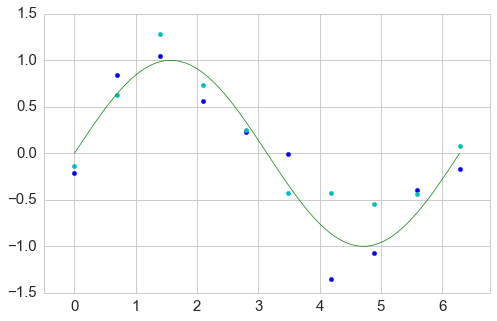

In [8]:
plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))

In [9]:
def error(x, y, poly):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s

In [10]:
def regularized_error(x, y, poly, reg_coeff):
    s = 0
    for i in range(len(y)):
        s += math.pow((y[i]-poly(x[i])), 2)
    return 0.5 * s + 0.5 * reg_coeff * np.dot(poly, poly)

error on train:       1.73821789141
reg. error on train:  1.75986192985
error on test:        1.34600726236
reg. error on test:   1.3676513008


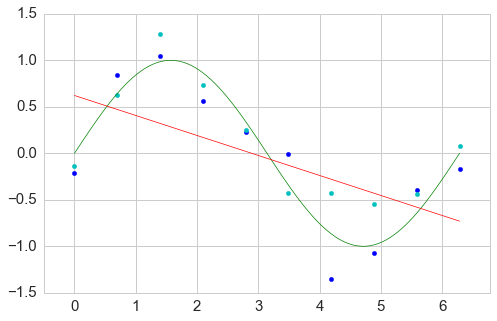

In [11]:
degree = 1
reg_coeff = 0.1

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))

error on train:       0.333411144406
reg. error on train:  0.526515586074
error on test:        0.359645370022
reg. error on test:   0.55274981169


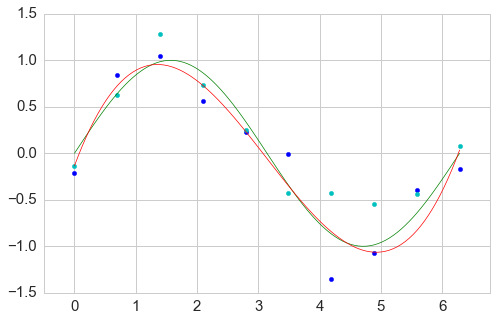

In [12]:
degree = 3
reg_coeff = 0.1

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))

error on train:       7.54004997897e-21
reg. error on train:  841.302569798
error on test:        0.757612824997
reg. error on test:   842.060182623


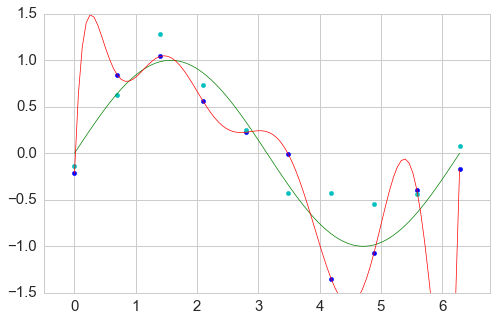

In [13]:
degree = 9
reg_coeff = 0.1

pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
poly = np.poly1d(np.polyfit(train.x.values, train.y.values, degree))
pred['y'] = pred.x.apply(poly)

print 'error on train:      ', error(train.x.values, train.y.values, poly)
print 'reg. error on train: ', regularized_error(train.x.values, train.y.values, poly, reg_coeff)
print 'error on test:       ', error(test.x.values, test.y.values, poly)
print 'reg. error on test:  ', regularized_error(test.x.values, test.y.values, poly, reg_coeff)

plt.figure(figsize=(8, 5))
_ = plt.plot(f_points.x, f_points.y, 'g-', linewidth=0.7)
_ = plt.scatter(train.x, train.y, color='b', marker='o')
_ = plt.scatter(test.x, test.y, color='c', marker='o')
_ = plt.plot(pred.x, pred.y, 'r-', linewidth=0.7)
_ = plt.xlim((-0.5, 2 * math.pi + 0.5))
_ = plt.ylim((-1.5, 1.5))

In [14]:
degrees = range(10)
reg_coeff = 0.1
train_errors = []
train_reg_errors = []
test_errors = []
test_reg_errors = []
for i in degrees:
    pred = pd.DataFrame({'x': np.linspace(0, 2 * math.pi, 100)})
    poly = np.poly1d(np.polyfit(train.x.values, train.y.values, i))
    pred['y'] = pred.x.apply(poly)
    train_errors.append(error(train.x.values, train.y.values, poly))
    train_reg_errors.append(regularized_error(train.x.values, train.y.values, poly, reg_coeff))
    test_errors.append(error(test.x.values, test.y.values, poly))
    test_reg_errors.append(regularized_error(test.x.values, test.y.values, poly, reg_coeff))

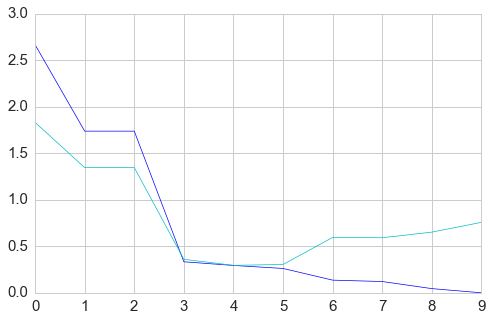

In [15]:
plt.figure(figsize=(8, 5))
_ = plt.plot(degrees, train_errors, 'b-', linewidth=0.7)
_ = plt.plot(degrees, test_errors, 'c-', linewidth=0.7)

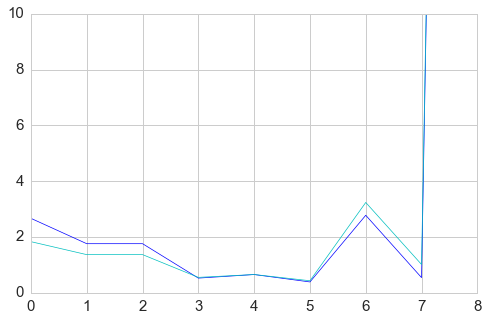

In [16]:
plt.figure(figsize=(8, 5))
_ = plt.plot(degrees, train_reg_errors, 'b-', linewidth=0.7)
_ = plt.plot(degrees, test_reg_errors, 'c-', linewidth=0.7)
_ = plt.xlim((0, 8))
_ = plt.ylim((0, 10))